<a href="https://colab.research.google.com/github/e-gluzman/implementations/blob/master/%D0%93%D0%BB%D1%83%D0%B7%D0%BC%D0%B0%D0%BD_%D0%95%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9_%22analytics_interview_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SberDevices - аналитика

3 раздела с короткими задачками и вопросами:
*   Работа с данными
*   Python
*   ML

# Аналитика

создаём тестовые данные для следующих задач

In [ ]:
import pandas as pd
 
dob = pd.DataFrame({
    'userId': [2,3,3,3,2,2,4,4],
    'userDoB': [
        '2021/01/01',
        '2021/01/01',
        '2021/01/01',
        '1990-05-09',
        '2021/01/01',
        '1991-06-10',
        '2021/01/01',
        '1992-07-11'
    ]
})
orders = pd.DataFrame({
    'userId': [1,2,1,2,3,4,2],
    'orderId': [11,12,13,14,15,16,17]
})
mails = pd.DataFrame({
    'userId': [2,3,4],
    'userMail': ['m2@sberdevices.ru','m3@sberdevices.ru','m4@sberdevices.ru']
})

In [ ]:
dob.head(10)

,userId,userDoB
0,2,2021/01/01
1,3,2021/01/01
2,3,2021/01/01
3,3,1990-05-09
4,2,2021/01/01
5,2,1991-06-10
6,4,2021/01/01
7,4,1992-07-11


In [ ]:
orders.head(3)

,userId,orderId
0,1,11
1,2,12
2,1,13


In [ ]:
mails.head(3)

,userId,userMail
0,2,m2@sberdevices.ru
1,3,m3@sberdevices.ru
2,4,m4@sberdevices.ru


1. Вывести квадраты чисел от 1 до 10

In [ ]:
for i in range(1,11):

  print(str(i **2))

1
4
9
16
25
36
49
64
81
100


2. Вывести количество записей по каждому userId в таблице dob

In [ ]:
dob.groupby('userId').count()

,userDoB
userId,
2,3
3,3
4,2


3. В таблице dob представлены ID пользователей и их введённые даты рождения. Для каждого пользователя вывести последнее указанное значение дня рождения

In [ ]:
dob.groupby('userId').last()

,userDoB
userId,
2,1991-06-10
3,1990-05-09
4,1992-07-11


4. Сервис http://endpoint.com:8888 возвращает для заданного userId имя пользователя по методу get_full_name. Если для данного ID нет имени в базе, возвращает None. Для каждого userId из dob получить имя пользователя через API

p.s. как можно эффективно устроить такой сбор информации?

In [234]:
import requests

def get_full_name(user_id):

  response = requests.get("http://endpoint.com:8888",params = {'user_id': user_id})
  name = response.json()["response"]["name"] 

  return name

In [262]:
# похоже адрес не действителен
# get_full_name(2)

5. Из существующих таблиц получить агрегированную таблицу вида userId, userMail, userDoB

In [ ]:
a = dob.groupby('userId').last()
final = a.merge(mails,on='userId',how='outer')
final

,userId,userDoB,userMail
0,2,1991-06-10,m2@sberdevices.ru
1,3,1990-05-09,m3@sberdevices.ru
2,4,1992-07-11,m4@sberdevices.ru


6. Дан датасет вида device-предсказанный интент-настоящий интент; надо проверить, что точность распознавания на device A выше, чем на B

In [ ]:
from random import randint, choice
import pandas as pd

data = pd.DataFrame({
    'device': [choice(['A', 'B', 'C']) for i in range(10000)],
    'pred': ['intent{}'.format(randint(1, 10)) for i in range(10000)],
    'true': ['intent{}'.format(randint(1, 10)) for i in range(10000)]
})
data['true'] = [pred if device=='A' and choice([0,1,1]) else true for pred, true, device in zip(data.pred, data.true, data.device)]
data

,device,pred,true
0,B,intent2,intent10
1,A,intent1,intent2
2,A,intent4,intent4
3,C,intent2,intent4
4,A,intent4,intent4
...,...,...,...
9995,B,intent1,intent6
9996,C,intent1,intent4
9997,B,intent8,intent6
9998,C,intent2,intent6


In [ ]:
data['result'] = data['pred'] == data['true']
#true = data.groupby('device').agg('result').value_counts()
true = data.groupby('device').agg('result').value_counts()
accuracy_a = true[0]/ (true[0] + true[1])
accuracy_b = true[3]/ (true[2] + true[3])
print(accuracy_a)
print(accuracy_b)

0.6913357400722022
0.1111111111111111


In [ ]:
data.groupby('device').agg('result').mean()


device
A    0.691336
B    0.111111
C    0.095252
Name: result, dtype: float64

In [ ]:
from scipy import stats

In [ ]:
b = data[data.device == 'B']['result']
c = data[data.device == 'C']['result']

In [ ]:
stats.ttest_ind(b,c)


Ttest_indResult(statistic=2.129995030831306, pvalue=0.03320850075954022)

7. посчитать основные метрики классификации на данном датасете

In [ ]:
# я вспомнил метрики самостоятельно, а потом погуглил, чтобы понять как они работают для случая с множественными классами. 

# я нашел хорошее объяснение вот здесь: https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd
# и здесь: https://towardsdatascience.com/comprehensive-guide-to-multiclass-classification-with-sklearn-127cc500f362

# код для вычисления метрик для кааждого класса писал сам.

In [ ]:
classes = data.true.unique()

In [128]:
import numpy as np

metrics = pd.DataFrame(np.zeros((10,4)))
metrics.index = classes
metrics.columns = ['precision','recall','F1','accuracy']

In [129]:
for name in classes:

  true_positive = data.true[(data.true == name) & (data.true == data.pred)].count()

  false_positive = data.true[(data.pred == name) & (data.true != name)].count()

  true_negative = data.true[(data.true != name) & (data.pred != name)].count()

  false_negative = data.true[(data.true == name) & (data.pred != name)].count()

  metrics.loc[name]['accuracy'] = true_positive/ (true_positive + false_positive + true_negative + false_negative)
  metrics.loc[name]['recall'] = true_positive/ (true_positive + false_negative)
  metrics.loc[name]['precision'] = true_positive/ (true_positive + false_positive)
  metrics.loc[name]['F1'] = 2 * metrics.loc[name]['precision'] * metrics.loc[name]['recall']/(metrics.loc[name]['precision'] + metrics.loc[name]['recall'])

metrics


,precision,recall,F1,accuracy
intent10,0.316390,0.297561,0.306687,0.0305
intent2,0.284449,0.283056,0.283751,0.0289
intent4,0.290616,0.289157,0.289884,0.0288
intent9,0.325188,0.327032,0.326107,0.0346
intent8,0.311587,0.315271,0.313418,0.0320
intent7,0.277487,0.282818,0.280127,0.0265
intent6,0.286585,0.280040,0.283275,0.0282
intent1,0.316751,0.313883,0.315311,0.0312
intent3,0.296670,0.304033,0.300306,0.0294
intent5,0.279570,0.291837,0.285572,0.0286


In [147]:
print('the average precision is ' + str(metrics.precision.mean()))
print('the average recall is ' + str(metrics.recall.mean()))
print('the average F1 score is ' + str(metrics.F1.mean()))

the average precision is 0.2985292985834665
the average recall is 0.2984686852946576
the average F1 score is 0.29844377286651425


In [ ]:
# так же можно использовать инструмент sklearn. полученный результат немного отличается, видимо имплементация немного другая. 
# но средний резльутат такой же

from sklearn.metrics import classification_report

print(classification_report(data.pred,data.true,target_names = classes))

              precision    recall  f1-score   support

    intent10       0.31      0.32      0.32       985
     intent2       0.30      0.32      0.31       964
     intent4       0.28      0.28      0.28      1016
     intent9       0.30      0.30      0.30       991
     intent8       0.29      0.29      0.29       991
     intent7       0.29      0.28      0.29      1023
     intent6       0.28      0.29      0.28       984
     intent1       0.28      0.28      0.28       955
     intent3       0.32      0.31      0.31      1027
     intent5       0.33      0.33      0.33      1064

    accuracy                           0.30     10000
   macro avg       0.30      0.30      0.30     10000
weighted avg       0.30      0.30      0.30     10000



8. визуализировать confusion matrix

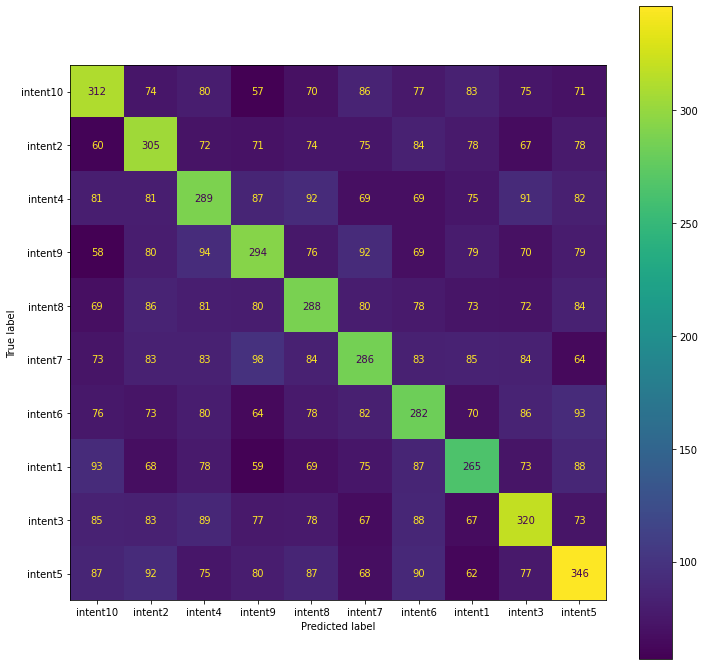

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize=(12, 12))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(data.pred, data.true),
    display_labels=classes,
)

cmp.plot(ax=ax)
plt.show();

------

# Python

1. Реализовать класс, который при инициализации получает имя JSON файла, считывает оттуда параметр "degree" - степень, в которую класс возводит входящее число при вызове метода calculate

In [215]:
import json

filename = 'settings.json'

with open(filename, 'w') as f:
    f.write(json.dumps({'degree': 3}, ensure_ascii=False, indent=4))

In [216]:
class Solution:

  def __init__(self,filename):

    self.filename = filename

  def calculate(self,number):

    file = open('settings.json')
    file_dict = json.load(file)
    degree = file_dict['degree']
    return number ** degree

In [219]:
 result = Solution(filename)
 result.calculate(10)

1000

2. Найти за линейное время 2 элемента в массиве, сумма которых равна заданному

In [ ]:
from random import randint
l = [randint(1, 100) for i in range(10*1000*1000)]
l[:10]

[24, 45, 35, 91, 84, 53, 31, 44, 15, 64]

In [206]:
# первое решение, которое я написал во время интервью

def solution_slow(l,number):

  for i in l:

    if i < number:

      for j in l: 

        if j < number:

          if i + j == number:

            return i,j




In [207]:
solution_slow(l,50)

(24, 26)

In [204]:
# второе решение, которое я написал в время интервью - оно быстрее. 

def solution_faster(l,number):

  set_l = set(l)

  for i in l:

    j = (number - i)

    if j in set_l:

      return i,j



In [205]:
solution_faster(l,50)

(24, 26)

In [256]:
# я погуглил и нашел решение аналогичной проблеме, адаптировал его. 
# думаю что это оптимальный алгоритм.

def solution_optimal(l, number):
    
    d = {}

    for i in l:

      j = number - i

      if j in d:

        return [i,j]

      else:

        d[i] = 1

In [257]:
solution_optimal(l,99)

[15, 84]

3. Дана строка из букв и знаков препинания. Проверить, является ли строка палиндромом. Знаки препинания на "свойство палиндромности" не влияют.

In [179]:
from random import choice

test_strings = [
  'лев осовел',
  'Лев, осовел',
  'не полиндром',
]
generated_palindrome = [choice('wertyuasdfghjxcvbnm') for i in range(10000)]
generated_palindrome = ''.join(generated_palindrome+list(reversed(generated_palindrome)))
generated_not_palindrome = ''.join([choice('wertyuasdfghjxcvbnm') for i in range(20000)])
test_strings.extend([generated_palindrome, generated_not_palindrome])
test_strings

['лев осовел',
 'Лев, осовел',
 'не полиндром',
 'avbbwucncaddffgjscegjhaursggbthcnujmwxsehcugdebhunfvbmsesmmxmvvrxjnwsjcjxrdvytsegyancgmnwbnwyyhrjumxuthhuytefsvademhcrshcffjabfhbfrhabcfwxmwsjrrndyjghryjtnratnddcbrwaejrhwybjhmyxwxydhfymxbafwtnumcustcmjybeusymwggyyatebgwvxdsmvgyycrvbedwrrhxnwygtysmxuvymhvtfctwhnggfasdrdcfrwvtmrmdabxuccejfynejfjbbyjvvmfndurnncawssucvmyyrbgwnefgmhgvhedrjgjwdydwyuctjmtdajagbayxxwebtngnwwttvrgjfydbcbsyjecxtfdndjtrmewbbrejebwnrjgjhffjdbsrtabycynnbtxyuysauhfvmxfxnaexgumbsvcwevghmgxnwfnmeyfgbcyfgggjnunwfraxyhnyjtjuvadahbgawtdvvfhmtugcrtavywerydarsmbhtehvghsehsxshshwjrrhngfaatummsrttxggycfraxtfdgsxcwuguvbgxahxvmsjhsfywcvawhtcuhfhdyruneehvaxxrhcfnuyjvvtjcybjesndbvhfxxjbyejrjarmvcgvsuhhxjejbgshgadwymmgxwhfsghchnjwhvvdsxrejnswtcavwmhsjyngnhwtvxcvvgdjgcyssabvjucmwubwyehuadbjawtdsxntmwywhwbmgctysfmgyjtsbbnefauxbhuxudvdhddnbxgwfsnxwrbvdbegxvttuwufafhnmexbfnvduevmsscsrmbdbhjbegyshwymdfdcgwuscxrsftmdgmrwrfyxbcrcuwvjtxjffuwrtdubeubnytajawydswtrnhfebbnenurnhsedfebvrfctje

In [258]:
# это задание решил самостоятельно, ничего не гуглил. 
# мое решение подошло для этих примеров.
# проверил себя и вспомнил, что для некоторых случаев необходимо внутреннее условие while left < right, дописал его.

def palindrome_solution(string):

  left = 0
  right = len(string) - 1

  string = string.lower()

  while left < right:

    while left < right and not string[left].isalnum():
      left += 1

    while left < right and not string[right].isalnum():
      right -= 1

    if string[left].lower() != string[right].lower():

      return False

    left +=1

    right -=1

  return True



In [259]:
palindrome_solution('абвг!_. гвб...???.а')

True

In [260]:
# проверяем строчки из задания. сгенерированная палиндромная строка:

palindrome_solution(test_strings[3])

True

In [261]:
#  проверяем строчки из задания. сгенерированная непалиндромная строка:

palindrome_solution(test_strings[4])

False

# ML

* устные вопросы

In [ ]:
;)